# P1


In [15]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt 
import matplotlib
from opt_evac_data import *


In [11]:
n,m = A.shape
f = cvx.Variable([m,T-1])
q = cvx.Variable([n,T])
node_risk = q.T @ r + cvx.square(q).T @ s
edge_risk = cvx.hstack([cvx.abs(f).T @ rtild + cvx.square(f).T @ stild, np.zeros(1)])
risk = node_risk + edge_risk

constr = [q[:,0] == q1, q[:,1:] == A @ f + q[:,:-1], 0 <= q, q <= np.tile(Q,(T,1)).T, cvx .abs(f) <= np.tile(F,(T-1,1)).T]
p = cvx.Problem(cvx.Minimize(sum(risk)), constr)
p.solve(verbose=True, solver=cvx.ECOS)
arr = lambda _: np.array(_.value)
q, f, risk, node_risk = map(arr, (q, f, risk, node_risk))


                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 01 12:19:50 PM: Your problem has 501 variables, 5 constraints, and 0 parameters.
(CVXPY) Jul 01 12:19:50 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 01 12:19:50 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 01 12:19:50 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 01 12:19:50 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 01 12:19:50 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

In [12]:
print("Total risk is ", p.value)
print("Evacuated at t =", (node_risk <= 1e-4).nonzero()[0][0] + 1)

Total risk is  6.589671916236638
Evacuated at t = 17


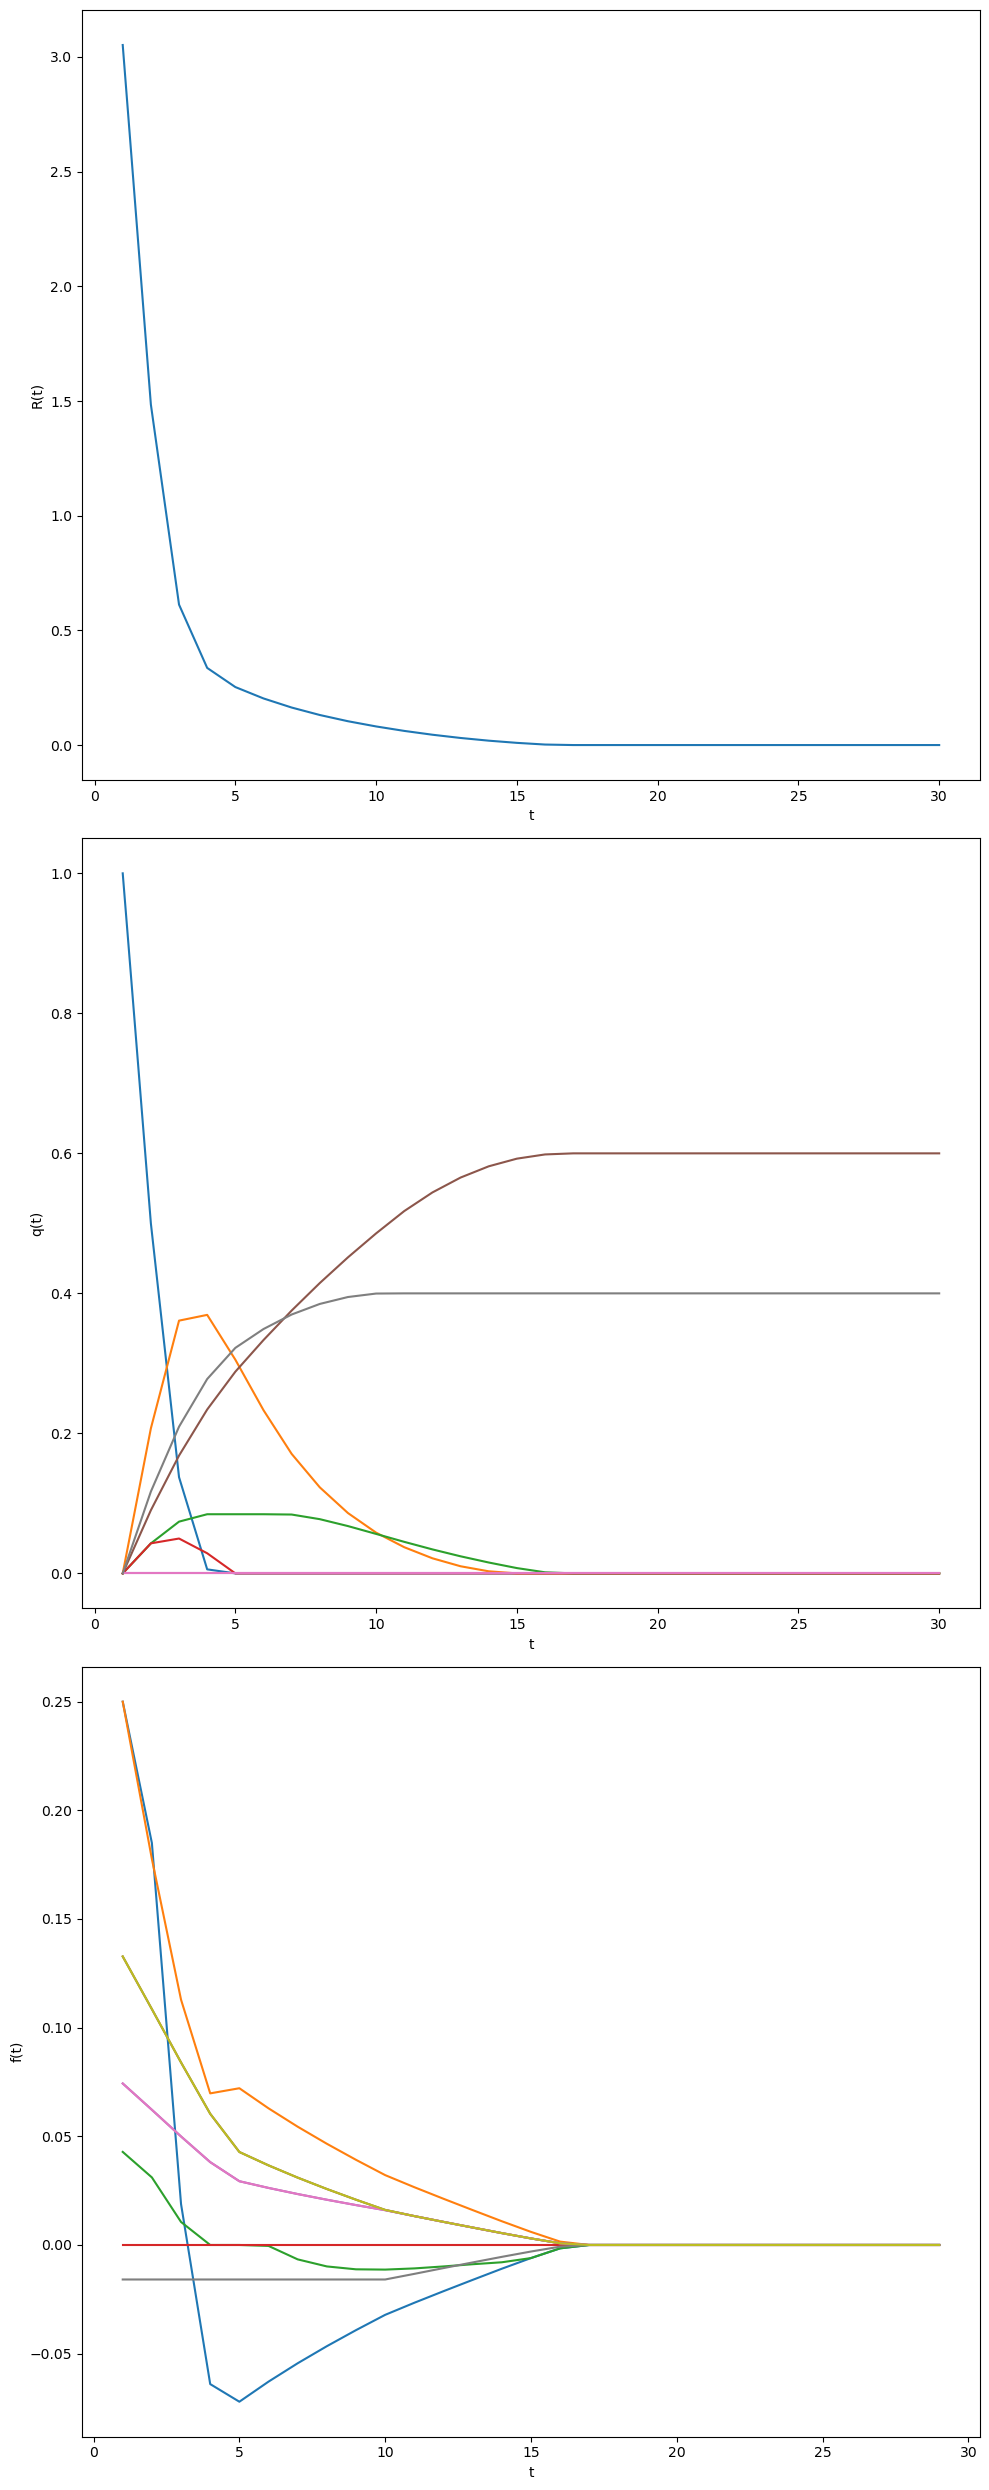

In [14]:
fig, axs = plt.subplots(3,1,figsize=(10,25))
axs[0].plot(np.arange(1,T+1), risk)
axs[0].set_ylabel("R(t)") 
axs[0].set_xlabel("t") 
axs[1].plot(np.arange(1,T+1), q.T) 
axs[1].set_ylabel("q(t)") 
axs[1].set_xlabel("t") 
axs[2].plot(np.arange(1,T), f.T) 
axs[2].set_ylabel("f(t)") 
axs[2].set_xlabel("t")
fig.tight_layout()
plt.show()

# P2

In [17]:
import numpy as np
import cvxpy as cvx
from blend_design_data import *

In [19]:
theta = cvx.Variable(k)

objective = cvx.Minimize(0)
constraints = [np.log(P) @ theta <= np.log(P_spec)] 
constraints += [np.log(D) @ theta <= np.log(D_spec)] 
constraints += [np.log(A) @ theta <= np.log(A_spec)] 
constraints += [cvx.sum(theta)==1, theta>=0] 
cvx.Problem(objective,constraints).solve()

0.0

In [20]:
w = np.exp(np.log(W) @ theta.value) 
print("w = ", w)
print("theta = ", theta.value)

w =  [2.63859837 3.28069166 2.96934036 3.26617754 2.32426888 3.66532996
 2.92976112 3.68571815 3.8940303  3.3972013 ]
theta =  [0.01758686 0.49673786 0.00452331 0.47531367 0.00408995 0.00174836]


# P3

In [21]:
import numpy as np
import cvxpy as cvx

In [24]:
n_1 = 1
n_2 = 1
n_3 = 1
n = n_1 + n_2 + n_3
S = np.ones((n_1+n_2,n_1+n_2))
T = np.ones((n_3+n_2,n_3+n_2))
R = cvx.Variable((n,n),PSD = True)
R1 = R[0:2,0:2]
R2 = R[1:3,1:3]
R13 = R[0,2]
objective = cvx.Minimize(cvx.norm(R1-S,"fro")**2 + cvx.norm(R2-T,"fro")**2 + cvx.norm(R13,"fro")**2)
p = cvx.Problem(objective,[])
p.solve()

0.17484495311647552

In [25]:
print(R.value)

[[1.09855076 0.84973176 0.19710124]
 [0.84973176 1.11456302 0.84973176]
 [0.19710124 0.84973176 1.09855076]]


# P4

In [27]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from various_obj_regulator_data import *

In [28]:
x = cp.Variable((n,T+1)) 
u = cp.Variable((m,T))

objective = cp.Minimize(cp.sum_squares(u)) 
const = [x[:,-1] == np.zeros(n)] 
const.append(x[:,0] == x_init)
for t in range(1,T+1):
    const.append(x[:,t] == A @ x[:,t-1] + B @ u[:,t-1]) 
problem = cp.Problem(objective, const)
problem.solve()

0.859499539411434

Text(0, 0.5, '||u_t||_2')

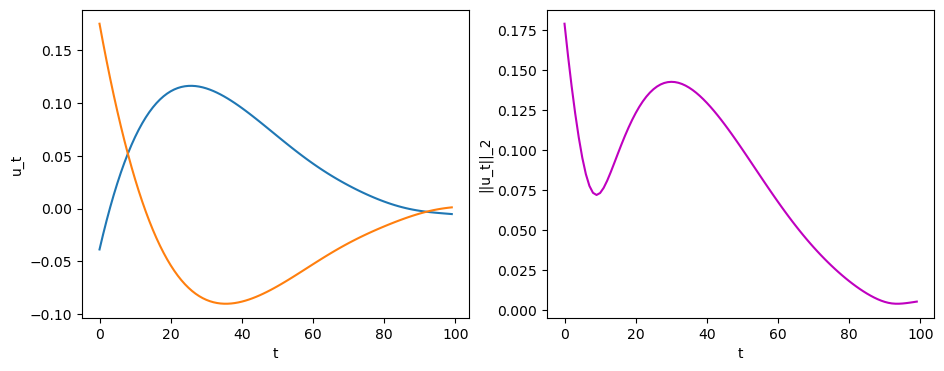

In [29]:
fig = plt.figure(figsize=(11,4)) 
plt.subplot(1,2,1)
plt.plot(u.value.T)
plt.ylabel("u_t") 
plt.xlabel("t")
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(np.linalg.norm(u.value,axis=0),"m") 
plt.ylabel("||u_t||_2") 

In [30]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from various_obj_regulator_data import *

In [32]:
x = cp.Variable((n,T+1)) 
u = cp.Variable((m,T))
objective = cp.Minimize(cp.sum(cp.norm(u,2,axis=0))) 
const = [x[:,-1] == np.zeros(n)]
const.append(x[:,0] == x_init)
for t in range(1,T+1):
    const.append(x[:,t] == A @ x[:,t-1] + B @ u[:,t-1]) 
problem = cp.Problem(objective, const)
problem.solve()


5.99685338546423

Text(0, 0.5, '||u_t||_2')

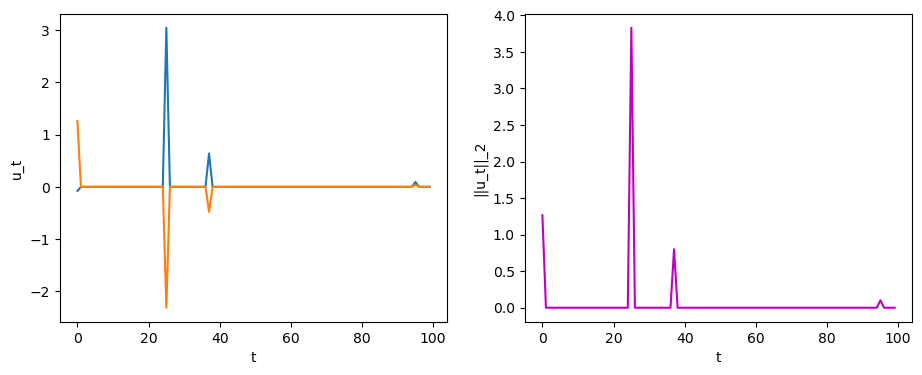

In [33]:
plt.figure(figsize=(11,4)) 
plt.subplot(1,2,1)
plt.plot(u.value.T)
plt.ylabel("u_t") 
plt.xlabel("t")
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(np.linalg.norm(u.value,axis=0),"m") 
plt.ylabel("||u_t||_2") 

In [34]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from various_obj_regulator_data import *

In [37]:
x = cp.Variable((n,T+1)) 
u = cp.Variable((m,T))
objective = cp.Minimize(cp.max(cp.norm(u,2,axis=0))) 
const = [x[:,-1] == np.zeros(n)]
const.append(x[:,0] == x_init)
for t in range(1,T+1):
    const.append(x[:,t] == A @ x[:,t-1] + B @ u[:,t-1]) 
problem = cp.Problem(objective, const)
problem.solve()

0.11047020864701963

(0.0, 0.12)

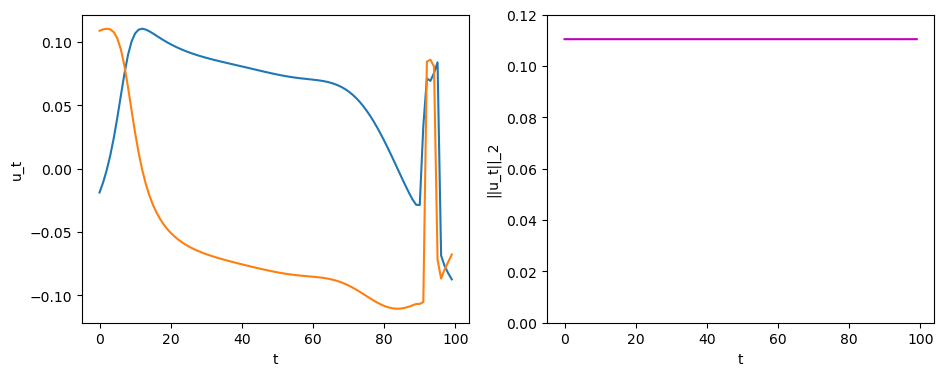

In [38]:
plt.figure(figsize=(11,4)) 
plt.subplot(1,2,1)
plt.plot(u.value.T)
plt.ylabel("u_t") 
plt.xlabel("t")
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(np.linalg.norm(u.value,axis=0),"m") 
plt.ylabel("||u_t||_2") 
plt.ylim(ymin = 0, ymax = 0.12)

In [40]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from various_obj_regulator_data import *

In [41]:
x = cp.Variable((n,T+1)) 
u = cp.Variable((m,T))
objective = cp.Minimize(cp.sum(cp.norm(u,1,axis=0))) 
const = [x[:,-1] == np.zeros(n)]
const.append(x[:,0] == x_init)
for t in range(1,T+1):
    const.append(x[:,t] == A @ x[:,t-1] + B @ u[:,t-1]) 
problem = cp.Problem(objective, const)
problem.solve()

7.044288826037959

Text(0, 0.5, '||u_t||_2')

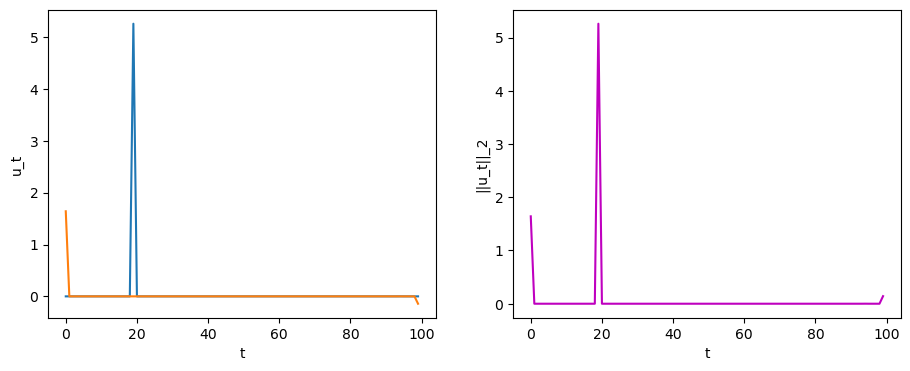

In [42]:
plt.figure(figsize=(11,4)) 
plt.subplot(1,2,1)
plt.plot(u.value.T)
plt.ylabel("u_t") 
plt.xlabel("t")
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(np.linalg.norm(u.value,axis=0),"m") 
plt.ylabel("||u_t||_2") 

# P5

In [52]:
import numpy as np
import cvxpy as cvx
from multi_risk_portfolio_data import *

In [55]:
w = cvx.Variable(n)
t = cvx.Variable()
risks = [cvx.quad_form(w, Sigma) for Sigma in (Sigma_1, Sigma_2, Sigma_3, Sigma_4, Sigma_5, Sigma_6)]
risk_constraints = [risk <= t for risk in risks]
problem = cvx.Problem(cvx.Maximize(w.T @ mu - gamma * t), risk_constraints + [cvx.sum(w) ==1])
problem.solve()

0.12188077796901299

In [61]:
print("worst case : ", t.value)
print("weights : ",w.value)
print("risks : ")
for risk in risks:
    print(risk.value)
    

worst case :  0.1218814786695336
weights :  [ 0.42473821  0.66426997 -0.11469037  1.38055509  1.42422852 -1.5270649
 -0.61401545 -0.49879081 -0.25406876  0.11483851]
risks : 
0.12188147869580121
0.0845435093292573
0.08247154816155884
0.12188147866255071
0.12188147865054373
0.12188147858733536
